<a href="https://www.kaggle.com/code/kapturovalexander/kapturov-s-playground-series-s3-e13?scriptVersionId=162516003" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://www.kaggle.com/competitions/49201/images/header)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e13/sample_submission.csv
/kaggle/input/playground-series-s3e13/train.csv
/kaggle/input/playground-series-s3e13/test.csv


# <span style="color: green;">Playground Series - Season 3, Episode 13</span>
## <span style="color: lime;">Classification with a Tabular Vector Borne Disease Dataset</span>

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Vector Borne Disease Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance. Note that in the original dataset some prognoses contain spaces, but in the competition dataset spaces have been replaced with underscores to work with the MPA@K metric.

**<span style="color: GreenYellow">Files</span>**
* train.csv - the training dataset; prognosis is the target
* test.csv - the test dataset; your objective is to predict prognosis
* sample_submission.csv - a sample submission file in the correct format

Submissions will be evaluated based on MPA@3. Each submission can contain up to 3 predictions (all separated by spaces), and the earlier a correct prediction occurs, the higher score it will receive.

### <span style="color: brown">Submission File</span>
For each id in the test set, you must predict the target prognosis. The file should contain a header and have the following format:
```Python
id,prognosis
707,Dengue West_Nile_fever Malaria
708,Lyme_disease West_Nile_fever Dengue
709,Dengue West_Nile_fever Lyme_disease
etc.
```

# <span style="color: lime;">1 - Import the necessary libraries

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# <span style="color: lime;">2 - Open training and test data

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s3e13/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e13/test.csv')
train.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


![](https://forpost-sevastopol.ru/outimg/aHR0cHM6Ly9zdGF0aWMubGlmZS5ydS9wdWJsaWNhdGlvbnMvMjAyMy8zLzMvMTI5NjM3MzE1ODY1My42OTYuanBlZw==)

In [4]:
# 2a - Save test id for submission file
ID = test.id
ID.head()

0    707
1    708
2    709
3    710
4    711
Name: id, dtype: int64

# <span style="color: lime;">3 - Display a list of features

In [5]:
train.columns.tolist()

['id',
 'sudden_fever',
 'headache',
 'mouth_bleed',
 'nose_bleed',
 'muscle_pain',
 'joint_pain',
 'vomiting',
 'rash',
 'diarrhea',
 'hypotension',
 'pleural_effusion',
 'ascites',
 'gastro_bleeding',
 'swelling',
 'nausea',
 'chills',
 'myalgia',
 'digestion_trouble',
 'fatigue',
 'skin_lesions',
 'stomach_pain',
 'orbital_pain',
 'neck_pain',
 'weakness',
 'back_pain',
 'weight_loss',
 'gum_bleed',
 'jaundice',
 'coma',
 'diziness',
 'inflammation',
 'red_eyes',
 'loss_of_appetite',
 'urination_loss',
 'slow_heart_rate',
 'abdominal_pain',
 'light_sensitivity',
 'yellow_skin',
 'yellow_eyes',
 'facial_distortion',
 'microcephaly',
 'rigor',
 'bitter_tongue',
 'convulsion',
 'anemia',
 'cocacola_urine',
 'hypoglycemia',
 'prostraction',
 'hyperpyrexia',
 'stiff_neck',
 'irritability',
 'confusion',
 'tremor',
 'paralysis',
 'lymph_swells',
 'breathing_restriction',
 'toe_inflammation',
 'finger_inflammation',
 'lips_irritation',
 'itchiness',
 'ulcers',
 'toenail_loss',
 'speech_pro

# <span style="color: lime;">4 - See train dataset size

In [6]:
train.shape

(707, 66)

In [7]:
# 4a - See test dataset size
test.shape

(303, 65)

# <span style="color: lime;">5 - Display descriptive statistics of training data

In [8]:
train.describe()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,...,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,353.000000,0.503536,0.449788,0.459689,0.487977,0.517680,0.449788,0.441301,0.487977,0.390382,...,0.148515,0.072136,0.097595,0.079208,0.084866,0.154173,0.144272,0.137199,0.032532,0.031117
std,204.237607,0.500341,0.497825,0.498725,0.500209,0.500041,0.497825,0.496894,0.500209,0.488181,...,0.355861,0.258896,0.296977,0.270254,0.278879,0.361370,0.351614,0.344301,0.177533,0.173758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,353.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,529.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,706.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# 5a - Display descriptive statistics of test data
test.describe()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,858.000000,0.577558,0.462046,0.458746,0.504950,0.531353,0.541254,0.488449,0.448845,0.458746,...,0.145215,0.092409,0.099010,0.102310,0.118812,0.165017,0.128713,0.122112,0.052805,0.033003
std,87.612784,0.494765,0.499382,0.499120,0.500803,0.499842,0.499120,0.500693,0.498199,0.499120,...,0.352900,0.290082,0.299169,0.303557,0.324102,0.371809,0.335436,0.327957,0.224015,0.178941
min,707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,782.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,858.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,933.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1009.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# <span style="color: lime;">6 - Check the number of gaps for each feature

In [10]:
train.isna().sum()

id                0
sudden_fever      0
headache          0
mouth_bleed       0
nose_bleed        0
                 ..
ulcers            0
toenail_loss      0
speech_problem    0
bullseye_rash     0
prognosis         0
Length: 66, dtype: int64

# <span style="color: lime;">7 - Look at the data type of the training set

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

#### <span style="color: orange">For each symptom, if the value is 1, then this symptom is present in the patient, if 0, then this symptom is not present in this patient</span>

# <span style="color: lime;">8 - Determine the number of people with a particular symptom

In [12]:
def count_symptom(feature):
    return sum(feature)


train.drop('prognosis', axis=1).apply(count_symptom)

id                249571.0
sudden_fever         356.0
headache             318.0
mouth_bleed          325.0
nose_bleed           345.0
                    ...   
itchiness            109.0
ulcers               102.0
toenail_loss          97.0
speech_problem        23.0
bullseye_rash         22.0
Length: 65, dtype: float64

# <span style="color: lime;">9 - Build a heat map of correlations (sns.heatmap produced anomalous errors)

In [13]:
correlation = train.corr()
correlation.style.background_gradient(cmap='cividis')

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
id,1.000000,0.019627,0.039787,0.049769,0.046349,-0.011303,0.010211,-0.030217,-0.015085,-0.005825,0.024304,0.056372,0.029228,0.012888,0.069533,-0.028298,0.009486,-0.014705,0.011822,-0.068172,0.017416,-0.069983,-0.001971,-0.036348,-0.062935,-0.071514,0.083662,-0.053118,-0.040980,0.019319,-0.026108,0.080827,-0.006080,-0.026658,-0.029868,0.049040,-0.013983,-0.105237,0.029306,0.023297,0.104940,0.062646,0.046442,-0.029498,0.035509,-0.046598,-0.046586,0.004355,0.068235,0.053047,0.087923,0.053278,0.018965,0.047342,0.042100,0.027148,0.061183,0.090935,0.058098,0.060082,0.021398,0.009625,0.006627,0.001953,0.007583
sudden_fever,0.019627,1.000000,0.124397,0.036049,0.097796,0.179499,0.169890,0.062081,0.177029,0.127716,0.191217,0.116716,0.169992,0.139022,0.078568,0.111094,0.182395,0.089044,0.061596,0.073798,0.161347,0.123820,0.118119,0.100208,0.111927,0.104520,0.108080,0.090744,0.107195,0.075121,0.091892,-0.010848,0.093780,0.024909,0.073218,0.086393,0.053280,0.049813,0.086586,0.039360,0.079261,0.043292,0.140907,0.148271,0.178712,0.145605,0.155273,0.163774,0.161431,0.054987,0.068391,0.060754,0.052337,0.014045,0.030586,0.040800,0.069103,0.050103,0.092201,0.068904,-0.249787,-0.252493,-0.237154,0.054514,0.031317
headache,0.039787,0.124397,1.000000,0.141593,0.101380,0.224059,0.199851,0.187048,0.095692,0.092428,0.098714,0.055930,0.077918,0.025484,0.018319,0.102305,0.061133,0.045950,0.011182,0.057472,0.085052,0.038548,0.050095,0.100565,0.041088,0.063286,0.000041,0.047836,0.092495,0.058993,0.007722,0.011982,-0.003777,-0.009049,-0.023047,-0.009497,0.014385,-0.050805,-0.041979,-0.002488,-0.018759,0.001219,0.032059,0.050138,0.047794,0.033672,0.003191,0.050049,0.037860,0.035257,0.077137,0.056881,0.050503,0.061441,0.049640,0.062142,0.099578,0.066726,0.082244,0.122559,-0.094693,-0.104211,-0.079576,0.090628,0.083588
mouth_bleed,0.049769,0.036049,0.141593,1.000000,0.206715,0.168994,0.158708,0.020446,0.064769,0.058910,0.169697,0.145360,0.109380,0.069619,0.087953,0.127547,0.097242,0.101975,0.083498,0.140809,0.162119,0.150625,0.108284,0.144090,0.041699,0.058910,0.089694,0.081643,0.119188,0.054295,0.075529,0.017133,0.015951,-0.084010,-0.080903,-0.077897,-0.072095,-0.064155,-0.072439,-0.077236,0.042110,-0.023699,0.145956,0.171689,0.111571,0.111521,0.141735,0.121749,0.108215,0.059465,0.094457,0.118601,0.123037,0.143177,0.063129,0.101618,0.082888,0.050509,0.076268,0.065368,-0.063708,-0.120258,-0.087354,0.070824,0.063531
nose_bleed,0.046349,0.097796,0.101380,0.206715,1.000000,0.177816,0.118444,0.084063,0.105565,0.117855,0.158394,0.170334,0.112167,0.085832,0.053097,0.182103,0.109155,0.059295,-0.048387,0.028702,0.098279,0.044054,0.074037,0.071159,0.051741,0.007646,0.068390,0.035098,0.100652,-0.043974,0.038690,0.016059,0.006998,-0.072196,-0.126144,-0.060892,-0.072018,-0.044811,-0.070221,-0.047178,0.021546,-0.045603,0.088354,0.106231,0.094157,0.087623,0.101855,0.070881,0.077163,0.009082,0.080523,0.054681,0.037107,0.064945,0.029712,0.061767,0.055925,0.031747,0.059443,0.078401,-0.166040,-0.175352,-0.159009,0.044286,0.053200
muscle_pain,-0.011303,0.179499,0.224059,0.168994,0.177816,1.000000,0.133019,0.025560,0.058896,0.070327,0.104801,-0.004508,0.066316,0.111949,0.022457,0.083209,0.107529,0.097401,0.016228,0.017979,0.111

# <span style="color: lime;">10 - Remove 4 features to reduce correlation to avoid multicolinearity

In [14]:
train.drop(columns=['finger_inflammation', 'lips_irritation', 'ulcers', 'toenail_loss'], axis=1, inplace=True)
correlation = train.corr()
correlation.style.background_gradient(cmap='summer')

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,itchiness,speech_problem,bullseye_rash
id,1.000000,0.019627,0.039787,0.049769,0.046349,-0.011303,0.010211,-0.030217,-0.015085,-0.005825,0.024304,0.056372,0.029228,0.012888,0.069533,-0.028298,0.009486,-0.014705,0.011822,-0.068172,0.017416,-0.069983,-0.001971,-0.036348,-0.062935,-0.071514,0.083662,-0.053118,-0.040980,0.019319,-0.026108,0.080827,-0.006080,-0.026658,-0.029868,0.049040,-0.013983,-0.105237,0.029306,0.023297,0.104940,0.062646,0.046442,-0.029498,0.035509,-0.046598,-0.046586,0.004355,0.068235,0.053047,0.087923,0.053278,0.018965,0.047342,0.042100,0.027148,0.061183,0.090935,0.021398,0.001953,0.007583
sudden_fever,0.019627,1.000000,0.124397,0.036049,0.097796,0.179499,0.169890,0.062081,0.177029,0.127716,0.191217,0.116716,0.169992,0.139022,0.078568,0.111094,0.182395,0.089044,0.061596,0.073798,0.161347,0.123820,0.118119,0.100208,0.111927,0.104520,0.108080,0.090744,0.107195,0.075121,0.091892,-0.010848,0.093780,0.024909,0.073218,0.086393,0.053280,0.049813,0.086586,0.039360,0.079261,0.043292,0.140907,0.148271,0.178712,0.145605,0.155273,0.163774,0.161431,0.054987,0.068391,0.060754,0.052337,0.014045,0.030586,0.040800,0.069103,0.050103,-0.249787,0.054514,0.031317
headache,0.039787,0.124397,1.000000,0.141593,0.101380,0.224059,0.199851,0.187048,0.095692,0.092428,0.098714,0.055930,0.077918,0.025484,0.018319,0.102305,0.061133,0.045950,0.011182,0.057472,0.085052,0.038548,0.050095,0.100565,0.041088,0.063286,0.000041,0.047836,0.092495,0.058993,0.007722,0.011982,-0.003777,-0.009049,-0.023047,-0.009497,0.014385,-0.050805,-0.041979,-0.002488,-0.018759,0.001219,0.032059,0.050138,0.047794,0.033672,0.003191,0.050049,0.037860,0.035257,0.077137,0.056881,0.050503,0.061441,0.049640,0.062142,0.099578,0.066726,-0.094693,0.090628,0.083588
mouth_bleed,0.049769,0.036049,0.141593,1.000000,0.206715,0.168994,0.158708,0.020446,0.064769,0.058910,0.169697,0.145360,0.109380,0.069619,0.087953,0.127547,0.097242,0.101975,0.083498,0.140809,0.162119,0.150625,0.108284,0.144090,0.041699,0.058910,0.089694,0.081643,0.119188,0.054295,0.075529,0.017133,0.015951,-0.084010,-0.080903,-0.077897,-0.072095,-0.064155,-0.072439,-0.077236,0.042110,-0.023699,0.145956,0.171689,0.111571,0.111521,0.141735,0.121749,0.108215,0.059465,0.094457,0.118601,0.123037,0.143177,0.063129,0.101618,0.082888,0.050509,-0.063708,0.070824,0.063531
nose_bleed,0.046349,0.097796,0.101380,0.206715,1.000000,0.177816,0.118444,0.084063,0.105565,0.117855,0.158394,0.170334,0.112167,0.085832,0.053097,0.182103,0.109155,0.059295,-0.048387,0.028702,0.098279,0.044054,0.074037,0.071159,0.051741,0.007646,0.068390,0.035098,0.100652,-0.043974,0.038690,0.016059,0.006998,-0.072196,-0.126144,-0.060892,-0.072018,-0.044811,-0.070221,-0.047178,0.021546,-0.045603,0.088354,0.106231,0.094157,0.087623,0.101855,0.070881,0.077163,0.009082,0.080523,0.054681,0.037107,0.064945,0.029712,0.061767,0.055925,0.031747,-0.166040,0.044286,0.053200
muscle_pain,-0.011303,0.179499,0.224059,0.168994,0.177816,1.000000,0.133019,0.025560,0.058896,0.070327,0.104801,-0.004508,0.066316,0.111949,0.022457,0.083209,0.107529,0.097401,0.016228,0.017979,0.111608,0.085805,0.014092,0.078680,0.048057,-0.016710,0.045150,0.076625,0.121848,0.000082,0.135528,0.019281,0.042637,-0.029054,0.013529,0.034278,0.010580,-0.000064,0.025327,0.008666,0.022306,0.032327,0.077946,0.033080,0.007922,0.042173,0.034730,0.0

# <span style="color: lime;">11 - Set up visualization

In [15]:
sns.set(rc={'figure.figsize': (24, 16)})

In [16]:
# 11a - Quantity of people with particular disease
diseases_frequency = train.prognosis.value_counts()
diseases_frequency

West_Nile_fever          85
Japanese_encephalitis    81
Tungiasis                70
Rift_Valley_fever        70
Chikungunya              66
Dengue                   63
Yellow_Fever             61
Zika                     58
Plague                   53
Lyme_disease             52
Malaria                  48
Name: prognosis, dtype: int64

# <span style="color: lime;">12 - Draw pie diagram

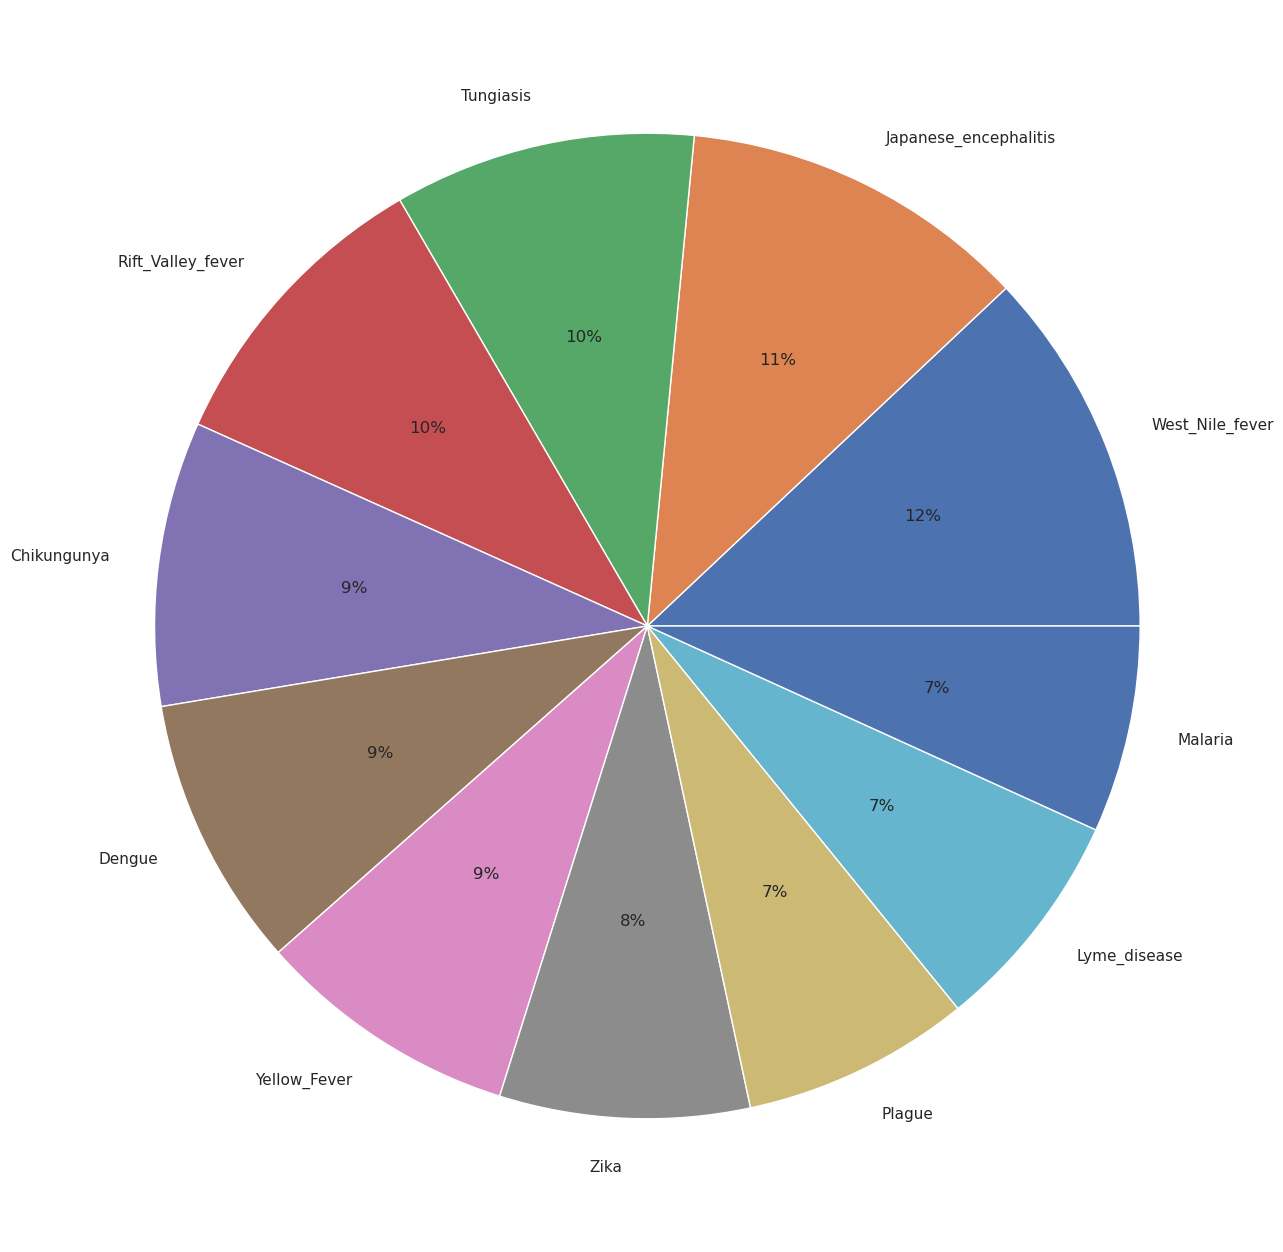

In [17]:
x_axis = diseases_frequency.keys().tolist()
y_axis = diseases_frequency.values
plt.pie(x=y_axis, labels=x_axis, autopct='%.0f%%');

# <span style="color: orange">Each of the diseases occupies a share of 7 to 12% of all patients</span>

# <span style="color: lime;">13 - Draw scatter and plot

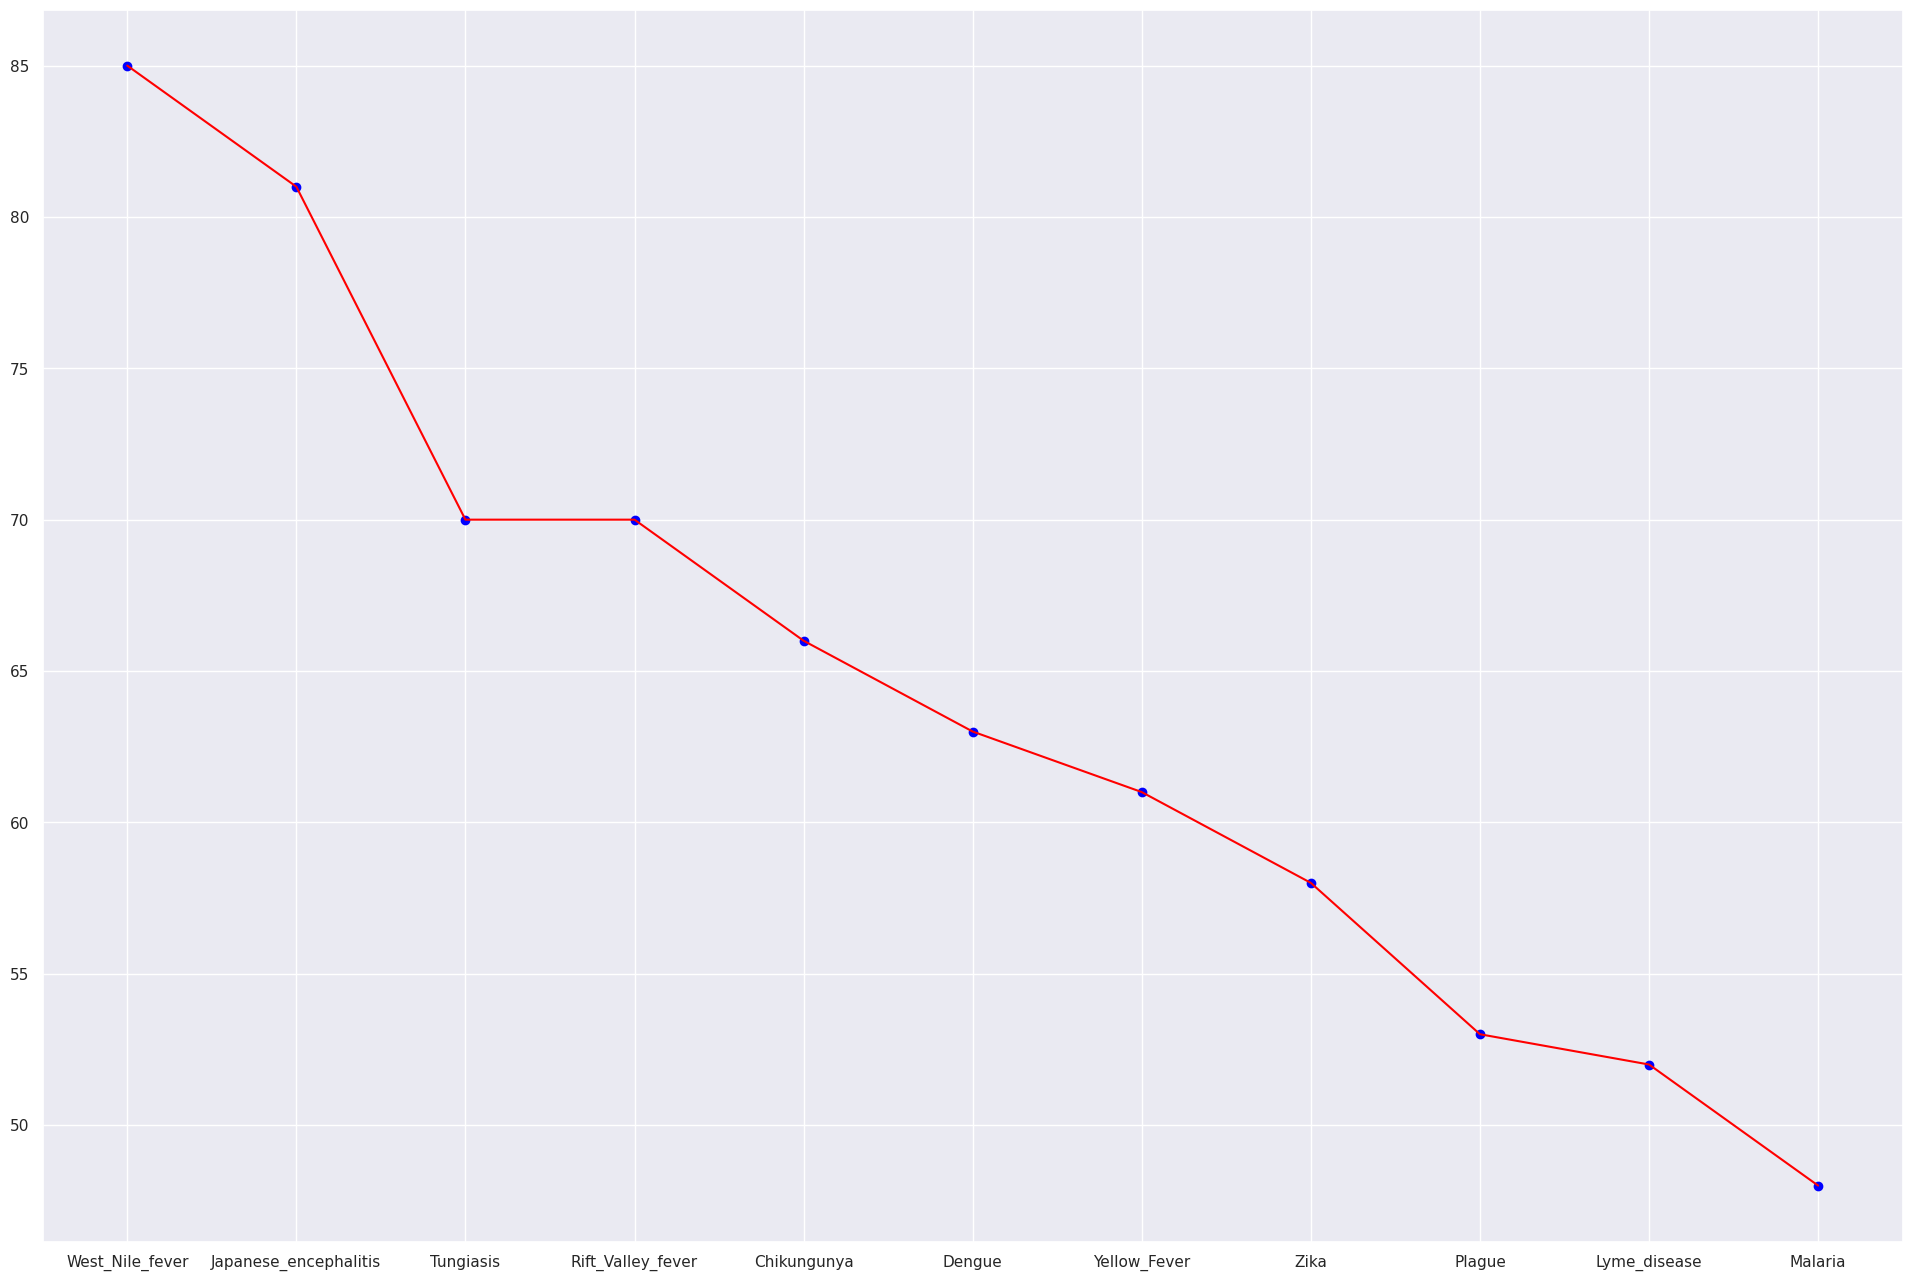

In [18]:
plt.scatter(x_axis, y_axis, color='blue')
plt.plot(x_axis, y_axis, color='red');

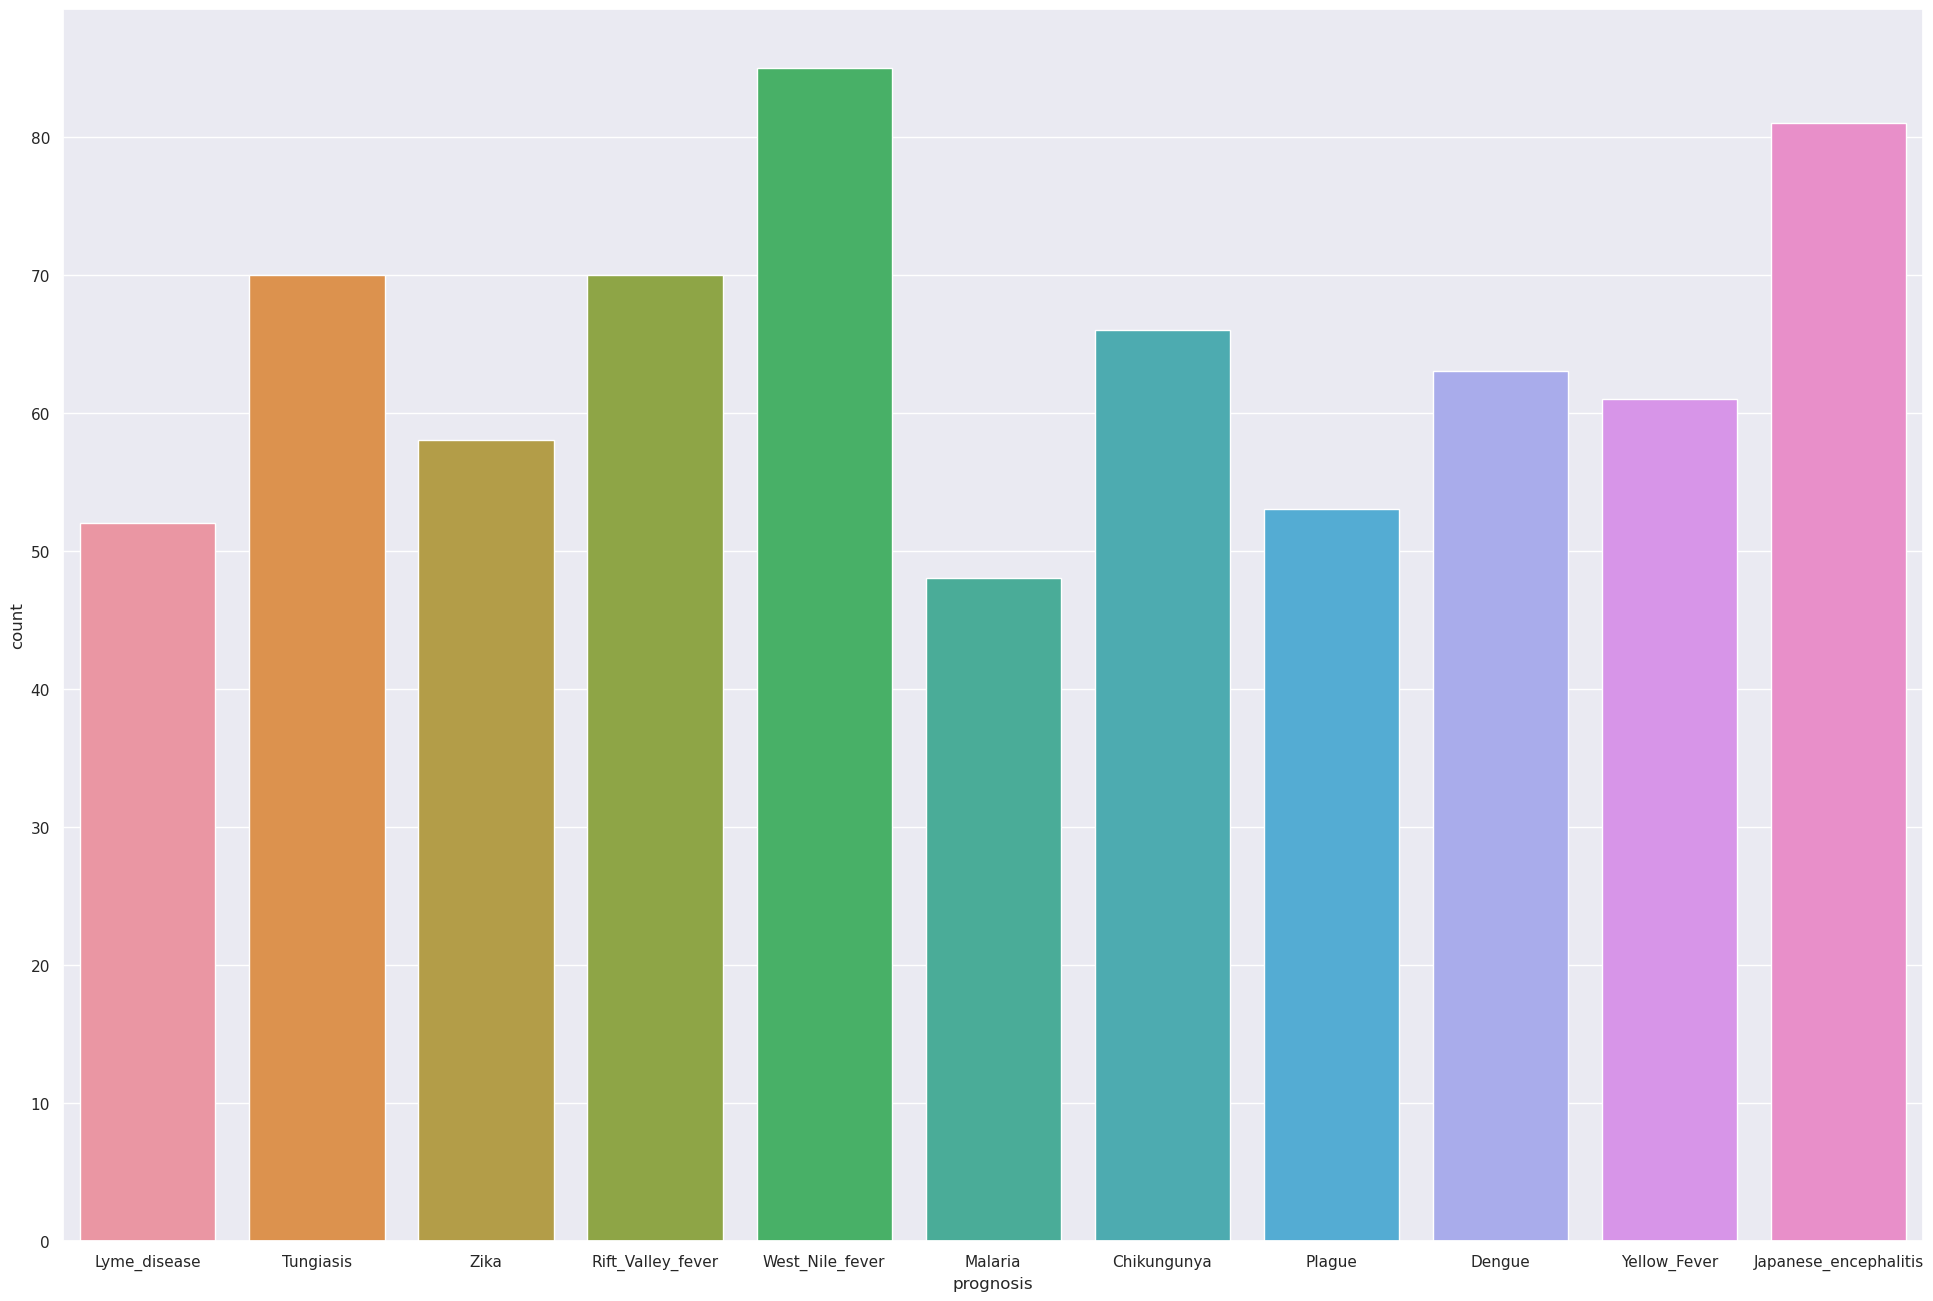

In [19]:
# 13a - Show the counts of observations in each prognosise value
sns.countplot(x='prognosis', data=train);

# <span style="color: lime;">14 - Encoder our prognosis labels as integers for easier decoding later

In [20]:
encoder = OrdinalEncoder()
train['prognosis'] = encoder.fit_transform(train[['prognosis']])
X = train.drop(['id', 'prognosis'], axis=1)
y = train['prognosis']

train['prognosis'][:10] # Note the values here are now ordinal (floats)

0     3.0
1     7.0
2     3.0
3    10.0
4     6.0
5     3.0
6     8.0
7     7.0
8     4.0
9     0.0
Name: prognosis, dtype: float64

# <span style="color: lime;">15 - Remove some features from test dataset

In [21]:
test = test.drop(columns=['id', 'finger_inflammation', 'lips_irritation', 'ulcers', 'toenail_loss'], axis=1)

![](https://hi-news.ru/wp-content/uploads/2015/01/virus.jpg)

# <span style='color: green'>Model creation</span>

# <span style="color: lime;">16 - Standardize data

In [22]:
sc = StandardScaler()
train_std = sc.fit_transform(X)
test_std = sc.transform(test)

# <span style="color: lime;">17 - Train CatBoostClassifier

In [23]:
clf = CatBoostClassifier()
clf.fit(train_std, y)
predictions = clf.predict_proba(test_std)

Learning rate set to 0.07774
0:	learn: 2.3645233	total: 82.9ms	remaining: 1m 22s
1:	learn: 2.3279086	total: 102ms	remaining: 51.1s
2:	learn: 2.2930858	total: 122ms	remaining: 40.6s
3:	learn: 2.2603653	total: 143ms	remaining: 35.5s
4:	learn: 2.2268378	total: 161ms	remaining: 32s
5:	learn: 2.1920895	total: 180ms	remaining: 29.9s
6:	learn: 2.1579236	total: 205ms	remaining: 29.1s
7:	learn: 2.1289867	total: 235ms	remaining: 29.2s
8:	learn: 2.1022217	total: 264ms	remaining: 29.1s
9:	learn: 2.0822307	total: 291ms	remaining: 28.8s
10:	learn: 2.0551854	total: 314ms	remaining: 28.2s
11:	learn: 2.0340559	total: 332ms	remaining: 27.4s
12:	learn: 2.0126087	total: 351ms	remaining: 26.7s
13:	learn: 1.9902848	total: 370ms	remaining: 26s
14:	learn: 1.9679793	total: 388ms	remaining: 25.5s
15:	learn: 1.9474437	total: 407ms	remaining: 25s
16:	learn: 1.9309784	total: 425ms	remaining: 24.6s
17:	learn: 1.9110428	total: 444ms	remaining: 24.2s
18:	learn: 1.8928834	total: 462ms	remaining: 23.9s
19:	learn: 1.877

In [24]:
# # 17a - Train logistic regression
# clf = LogisticRegression(max_iter=1_000)
# clf.fit(train_std, y)
# predictions = clf.predict_proba(test_std)

In [25]:
# # 17b - Train XGBClassifier
# clf = XGBClassifier()
# clf.fit(train_std, y)
# predictions = clf.predict_proba(test_std)

# <span style="color: lime;">18 - Shows the probabilities of attributing the first observation to a particular disease class

In [26]:
predictions[0]

array([0.01508306, 0.09992375, 0.05883242, 0.00067809, 0.00100146,
       0.00435697, 0.53455301, 0.22654757, 0.01724672, 0.01600212,
       0.02577483])

# <span style="color: lime;">19 - Arrange the indices in order of increasing probability of referring to the disease in first observation

In [27]:
sorted_ids = np.argsort(predictions[0])
sorted_ids

array([ 3,  4,  5,  0,  9,  8, 10,  2,  1,  7,  6])

# <span style="color: lime;">20 - Get top 3 predictions and then use our encoder to turn them back into string labels

In [28]:
top_3_ids = sorted_ids[-1:-4:-1]
top_3 = encoder.inverse_transform(top_3_ids.reshape(-1, 1)) # inverse_transform expects a 2D array, so we reshape our vector (but this won't be necessary when we run on multiple predictions at once)
top_3

array([['Rift_Valley_fever'],
       ['Tungiasis'],
       ['Dengue']], dtype=object)

![](https://extempore.info/images/ZTD_1_2015/ZTD4-15_Page18_foto.jpg)

# <span style="color: lime;">21 - Arrange the indices in order of increasing probability of referring to the disease in all observation

In [29]:
sorted_prediction_ids = np.argsort(predictions, axis=1)
top_3_prediction_ids = sorted_prediction_ids[:, -1:-4:-1]

original_shape = top_3_prediction_ids.shape
top_3_predictions = encoder.inverse_transform(top_3_prediction_ids.reshape(-1, 1))
top_3_predictions = top_3_predictions.reshape(original_shape)
top_3_predictions[:10] # check our first 10 values

array([['Rift_Valley_fever', 'Tungiasis', 'Dengue'],
       ['Dengue', 'Plague', 'Chikungunya'],
       ['West_Nile_fever', 'Japanese_encephalitis', 'Tungiasis'],
       ['Rift_Valley_fever', 'Japanese_encephalitis', 'Yellow_Fever'],
       ['West_Nile_fever', 'Malaria', 'Dengue'],
       ['West_Nile_fever', 'Malaria', 'Zika'],
       ['Malaria', 'Japanese_encephalitis', 'Zika'],
       ['Dengue', 'Chikungunya', 'Tungiasis'],
       ['Yellow_Fever', 'Malaria', 'Zika'],
       ['Malaria', 'Yellow_Fever', 'West_Nile_fever']], dtype=object)

# <span style="color: lime;">22 - Set target with appropriate format

In [30]:
test['prognosis'] = np.apply_along_axis(lambda x: np.array(' '.join(x), dtype="object"), 1, top_3_predictions)
test['prognosis'][:10] # check our first 10 values

0                   Rift_Valley_fever Tungiasis Dengue
1                            Dengue Plague Chikungunya
2      West_Nile_fever Japanese_encephalitis Tungiasis
3    Rift_Valley_fever Japanese_encephalitis Yellow...
4                       West_Nile_fever Malaria Dengue
5                         West_Nile_fever Malaria Zika
6                   Malaria Japanese_encephalitis Zika
7                         Dengue Chikungunya Tungiasis
8                            Yellow_Fever Malaria Zika
9                 Malaria Yellow_Fever West_Nile_fever
Name: prognosis, dtype: object

# <span style="color: lime;">23 - Preparing csv-file

In [31]:
test['id'] = ID
test.to_csv('CatBoost_submission PS3-E13.csv', columns=['id', 'prognosis'], index=False)

![](https://futurehealthcaretoday.com/wp-content/uploads/2021/01/shutterstock_691541095-scaled.jpg)